<h3> The dataset contains the readings with a time span of 1 minute of house appliances in kW from a smart meter and weather conditions of that particular region.

|Attribute|Description|
|:--|:--|
|Time	  |Time of the readings, with a time span of 1 min. |
|Use [kW] |Total energy consumption |
|Gen [kW] |Total energy generated by means of solar |
|House overall [kW]|Overall house energy consumption|
|Fridge [kW]|Energy consumed by specific appliance|
|Wine cellar [kW]|
|Garage door [kW]|
|Dishwasher [kW]|
|Furnace 1 [kW]|
|Furnace 2 [kW]|
|Home office [kW]|
|Barn [kW]|
|Well [kW]|
|Living room [kW]|
|Kitchen 12 [kW]|
|Kitchen 14 [kW]|
|Kitchen 38 [kW]|
|Microwave [kW]|
|Solar [kW]|Solar power generation|
|Temperature [(°C)]|Temperature is a physical quantity expressing hot and cold.|
|Icon|The icon that is used by the data collection system|
|Humidity|Humidity is the concentration of water vapour present in air.|
|Visibility [metres]|Visibility sensors measure the meteorological optical range which is defined as the length of atmosphere over which a beam of light travels before its luminous flux is reduced to 5% of its original value.|
|Summary|Report generated by data collection system|
|ApparentTemperature|Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed. The measure is most commonly applied to the perceived outdoor temperature.|
|pressure |Air pressure. Falling air pressure indicates that bad weather is coming, while rising air pressure indicates good weather|
|WindSpeed [km/h]|Wind speed, or wind flow speed, is a fundamental atmospheric quantity caused by air moving from high to low pressure, usually due to changes in temperature.|
|CloudCover [Okta]|Cloud cover refers to the fraction of the sky obscured by clouds.|
|windBearing|In meteorology, an azimuth of 000° is used only when no wind is blowing, while 360° means the wind is from the North. True Wind Direction True North is represented on a globe as the North Pole. All directions relative to True North may be called "true bearings".|
|dewPoint|The atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form.|
|PrecipProbability|A probability of precipitation|
|PrecipIntensity [mm/h]|The intensity of rainfall is a measure of the amount of rain that falls over time.|

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1> 1. Understanding the data

In [3]:
#reading the dataset
df=pd.read_csv('HomeC.csv', low_memory=False)

In [4]:
df.shape

(503911, 32)

In [5]:
df.head(3)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [6]:
df.describe()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,...,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,...,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,...,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,...,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,...,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,...,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,...,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,...,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [8]:
#function to understand dataset 

def understand_data(data) :
    
    return(pd.DataFrame({"Datatype":data.dtypes,
                         "No of NAs":data.isna().sum(),
                         "No of Levels":data.nunique(axis=0,dropna=True),
                         "Levels": data.apply(lambda x: str(x.unique()),axis=0)}))
understand_data(df)

,Datatype,No of NAs,No of Levels,Levels
time,object,0,503911,['1451624400' '1451624401' '1451624402' ... '1...
use [kW],float64,1,130103,[0.93283333 0.93433333 0.93181667 ... 1.551816...
gen [kW],float64,1,29904,[0.00348333 0.00346667 0.00343333 ... 0.1532 ...
House overall [kW],float64,1,130103,[0.93283333 0.93433333 0.93181667 ... 1.551816...
Dishwasher [kW],float64,1,9595,[3.33000000e-05 0.00000000e+00 1.67000000e-05 ...
Furnace 1 [kW],float64,1,28755,[0.0207 0.02071667 0.1069 ... 0.189716...
Furnace 2 [kW],float64,1,28700,[0.06191667 0.06381667 0.06231667 ... 0.5292 ...
Home office [kW],float64,1,23272,[0.44263333 0.44406667 0.44606667 ... 0.233166...
Fridge [kW],float64,1,13986,[0.12415 0.124 0.12353333 ... 0.060083...
Wine cellar [kW],float64,1,10738,[0.00698333 0.00685 0.00671667 ... 0.05885 ...


- continuous data except for three attributes,  - icon, summary and cloudcover which are categorical
- time has discrete data
- Cloud seems to be wrongly read as object. Missing values are entered as 'cloudCover'.
- One row of missing value in the entire dataset.
- The column 'time' is in unix timestamp. Convert the timestamp to date and time.

<h1>2. Preprocessing

In [9]:
#Removing [kW] from column names
df.columns = [feature.replace(' [kW]', '') for feature in df.columns]
df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [10]:
#Furnace1 and Furnace2 columns can be combined
df['Furnace']=df[['Furnace 1','Furnace 2']].sum(axis=1)

In [11]:
#Kitchen 12, Kitchen 14, and Kitchen 38 can be combined
df['Kitchen'] = df[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)

In [12]:
df.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38'],axis=1,inplace=True)

In [13]:
#Removing the duplicate columns found during EDA
df.drop(['Solar','House overall'],axis=1,inplace=True)

In [14]:
df.rename(columns={'use':'Used','gen':'Generated'}, inplace=True)

In [15]:
df.columns

Index(['time', 'Used', 'Generated', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace', 'Kitchen'],
      dtype='object')

<h2> Removing Null Values

In [16]:
df[df.isnull().any(axis=1)]

,time,Used,Generated,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [17]:
#Last row contains NaN, so we remove it from data.
df=df.dropna()

In [18]:
df.isna().sum()

time                   0
Used                   0
Generated              0
Dishwasher             0
Home office            0
Fridge                 0
Wine cellar            0
Garage door            0
Barn                   0
Well                   0
Microwave              0
Living room            0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
Furnace                0
Kitchen                0
dtype: int64

<h2> Invalid rows

In [19]:
# During EDA we found that attribute 'cloudCover' was wrongly read as object. Missing values are entered as 'cloudCover'.
#Perfoming necessary steps to handle missing values in this column. 
df['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', '0.41', '0.78', '0.2', '0.77', '0.46', '0.55', '0.01',
       '0.51', '0.47', '0.5', '0.4', '0.3', '0.43', '0.33', '0.6', '0.68',
       '0.66', '0.45', '0.34', '0.52', '0.67', '0.49', '0.37', '0.36',
       '0.61', '0.38', '0.42', '0.53', '0.63', '0.32', '0.56', '0.58',
       '0.72', '0.73', '0.71', '0.64', '0.59'], dtype=object)

In [20]:
df[df['cloudCover']=='cloudCover'].shape


(58, 27)

In [21]:
#we have to replace this missing values entered as cloudcover with next valid observation 

In [22]:
df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
df['cloudCover'] = df['cloudCover'].astype('float')
df['cloudCover'].unique()

array([0.75, 0.  , 1.  , 0.31, 0.44, 0.13, 0.19, 0.25, 0.16, 0.21, 0.15,
       0.14, 0.27, 0.28, 0.17, 0.05, 0.1 , 0.26, 0.29, 0.11, 0.09, 0.12,
       0.06, 0.02, 0.08, 0.04, 0.35, 0.22, 0.23, 0.54, 0.39, 0.03, 0.07,
       0.76, 0.62, 0.18, 0.79, 0.48, 0.24, 0.57, 0.41, 0.78, 0.2 , 0.77,
       0.46, 0.55, 0.01, 0.51, 0.47, 0.5 , 0.4 , 0.3 , 0.43, 0.33, 0.6 ,
       0.68, 0.66, 0.45, 0.34, 0.52, 0.67, 0.49, 0.37, 0.36, 0.61, 0.38,
       0.42, 0.53, 0.63, 0.32, 0.56, 0.58, 0.72, 0.73, 0.71, 0.64, 0.59])

<h2> Datetime Information 

In [23]:
import time
#Finding the start time
start_time=time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(df['time'].iloc[0])))

In [24]:
#Converting the unix timestamp values in the column 'time' to a readable date format
#Setting freq= 'min' since readings are being taken in a time span of one min

df['time'] = pd.date_range(start_time, periods=len(df),  freq='min') 

In [25]:
df.head(3)

,time,Used,Generated,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
0,2015-12-31 21:00:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.082617,0.000567
1,2015-12-31 21:01:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.084533,0.000567
2,2015-12-31 21:02:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.083017,0.000617


<h2> Feature Engineering 

In [26]:
#Extracting new features from 'time' column
df['year'] = df['time'].apply(lambda x : x.year)
df['month'] = df['time'].apply(lambda x : x.month)
df['day'] = df['time'].apply(lambda x : x.day)
df['weekday'] = df['time'].apply(lambda x : x.day_name())
df['weekofyear'] = df['time'].apply(lambda x : x.weekofyear)
df['hour'] = df['time'].apply(lambda x : x.hour)
df['minute'] = df['time'].apply(lambda x : x.minute)
df.head(3)

,time,Used,Generated,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,...,precipProbability,Furnace,Kitchen,year,month,day,weekday,weekofyear,hour,minute
0,2015-12-31 21:00:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,...,0.0,0.082617,0.000567,2015,12,31,Thursday,53,21,0
1,2015-12-31 21:01:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,...,0.0,0.084533,0.000567,2015,12,31,Thursday,53,21,1
2,2015-12-31 21:02:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,...,0.0,0.083017,0.000617,2015,12,31,Thursday,53,21,2


In [27]:
#Hour variable can be labelled as Night, Morning, Afternoon and Evening based on its number.
#Night : 22:00 - 23:59 / 00:00 - 03:59
#Morning : 04:00 - 11:59
#Afternoon : 12:00 - 16:59
#Evening : 17:00 - 21:59
def hours2timing(x):
    if x in [22,23,0,1,2,3]:
        timing = 'Night'
    elif x in range(4, 12):
        timing = 'Morning'
    elif x in range(12, 17):
        timing = 'Afternoon'
    elif x in range(17, 22):
        timing = 'Evening'
    else:
        timing = 'X'
    return timing

In [28]:
df['timing'] = df['hour'].apply(hours2timing)

In [29]:
df.head(3)

,time,Used,Generated,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,...,Furnace,Kitchen,year,month,day,weekday,weekofyear,hour,minute,timing
0,2015-12-31 21:00:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,...,0.082617,0.000567,2015,12,31,Thursday,53,21,0,Evening
1,2015-12-31 21:01:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,...,0.084533,0.000567,2015,12,31,Thursday,53,21,1,Evening
2,2015-12-31 21:02:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,...,0.083017,0.000617,2015,12,31,Thursday,53,21,2,Evening


In [30]:
year = df.pop('year')
df.insert(1, 'year', year)
month = df.pop('month')
df.insert(2, 'month', month)
day = df.pop('day')
df.insert(3, 'day', day)
weekday = df.pop('weekday')
df.insert(4, 'weekday', weekday)
weekofyear = df.pop('weekofyear')
df.insert(5, 'weekofyear', weekofyear)
hour = df.pop('hour')
df.insert(6, 'hour', hour)
minute = df.pop('minute')
df.insert(7, 'minute', minute)
timing=df.pop('timing')
df.insert(8,'timing',timing)

In [31]:
df = df.set_index('time')

In [32]:

df.head(3)

,year,month,day,weekday,weekofyear,hour,minute,timing,Used,Generated,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
time,,,,,,,,,,,,,,,,,,,,,
2015-12-31 21:00:00,2015,12,31,Thursday,53,21,0,Evening,0.932833,0.003483,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.082617,0.000567
2015-12-31 21:01:00,2015,12,31,Thursday,53,21,1,Evening,0.934333,0.003467,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.084533,0.000567
2015-12-31 21:02:00,2015,12,31,Thursday,53,21,2,Evening,0.931817,0.003467,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.083017,0.000617


<h2> Removing unwanted columns

In [33]:
df['summary'].unique()

array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow'], dtype=object)

In [34]:
df['icon'].unique()

array(['clear-night', 'partly-cloudy-night', 'clear-day', 'cloudy',
       'partly-cloudy-day', 'rain', 'snow', 'wind', 'fog'], dtype=object)

- Since the columns icon and summary are almost same and summary contains more data points we are dropping icon

In [35]:
df=df.drop(['icon'], axis=1)

In [36]:
df.columns

Index(['year', 'month', 'day', 'weekday', 'weekofyear', 'hour', 'minute',
       'timing', 'Used', 'Generated', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'temperature', 'humidity', 'visibility', 'summary',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace', 'Kitchen'],
      dtype='object')

In [37]:
#Seperating Energy and Weather data for convinience

In [38]:

energy_data = df.filter(items=['Used', 'Generated', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room','Furnace', 'Kitchen' ])
weather_data = df.filter(items=['temperature', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'])

In [39]:
energy_data.head(3)

,Used,Generated,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,Kitchen
time,,,,,,,,,,,,,
2015-12-31 21:00:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.082617,0.000567
2015-12-31 21:01:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.084533,0.000567
2015-12-31 21:02:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.083017,0.000617


# Feature Reduction

<AxesSubplot:>

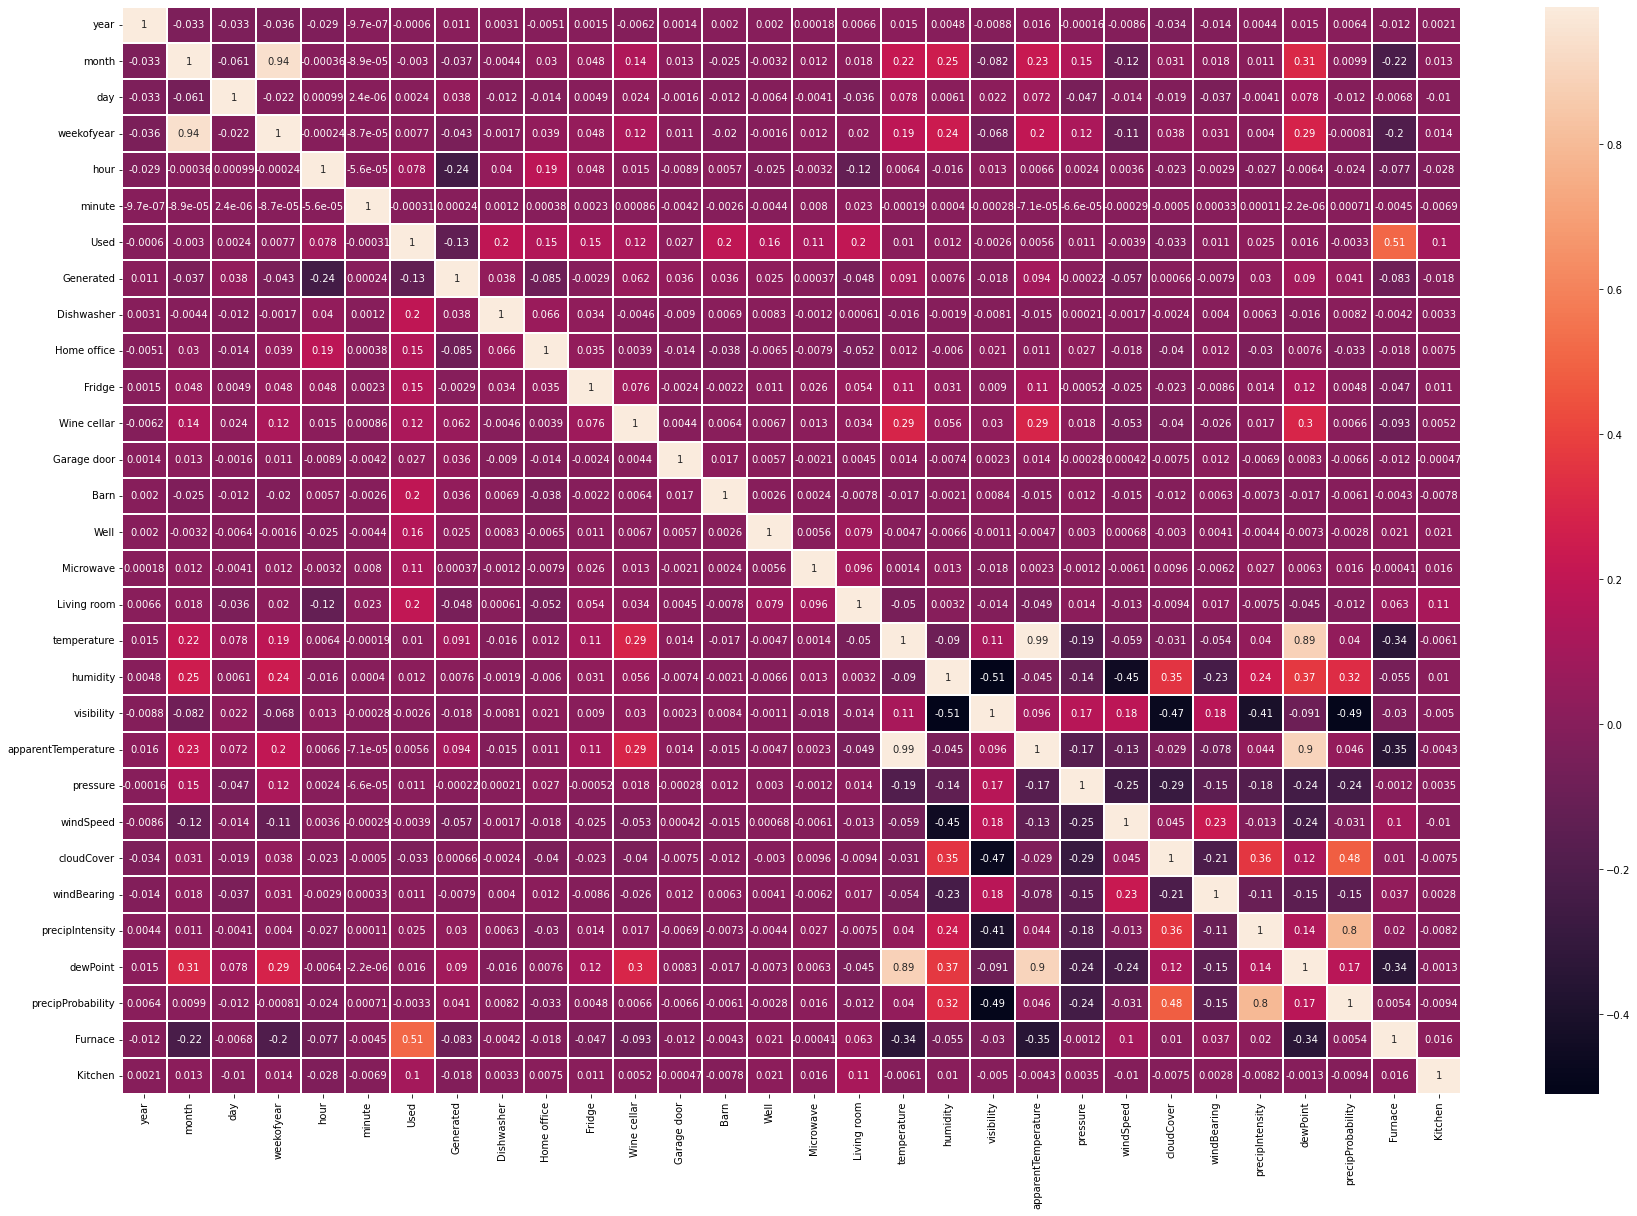

In [40]:
cormatrix=df.corr()
plt.subplots(figsize=(30,20))
sns.heatmap(cormatrix,vmin=-0.51, vmax=0.99, annot=True,linewidth = 0.2)

In [41]:
cormatrix

,year,month,day,weekofyear,hour,minute,Used,Generated,Dishwasher,Home office,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
year,1.000000e+00,-0.032686,-0.033488,-0.035880,-0.028679,-9.747575e-07,-0.000596,0.010721,0.003098,-0.005107,...,0.016341,-0.000163,-0.008562,-0.034166,-0.014147,0.004363,0.014645,0.006435,-0.011828,0.002135
month,-3.268613e-02,1.000000,-0.061392,0.943644,-0.000364,-8.916315e-05,-0.002962,-0.036903,-0.004368,0.029832,...,0.227947,0.145137,-0.120812,0.031118,0.018080,0.010691,0.309237,0.009911,-0.222309,0.013375
day,-3.348847e-02,-0.061392,1.000000,-0.022355,0.000995,2.394301e-06,0.002412,0.038398,-0.012312,-0.014352,...,0.071674,-0.047438,-0.013601,-0.019386,-0.037482,-0.004133,0.077769,-0.011662,-0.006821,-0.010306
weekofyear,-3.587969e-02,0.943644,-0.022355,1.000000,-0.000244,-8.718877e-05,0.007672,-0.042981,-0.001702,0.039321,...,0.200400,0.123982,-0.111959,0.038134,0.031124,0.003970,0.285426,-0.000812,-0.199452,0.013836
hour,-2.867867e-02,-0.000364,0.000995,-0.000244,1.000000,-5.588266e-05,0.077632,-0.243481,0.039668,0.186128,...,0.006633,0.002433,0.003596,-0.023318,-0.002886,-0.027205,-0.006373,-0.024462,-0.076851,-0.027897
minute,-9.747575e-07,-0.000089,0.000002,-0.000087,-0.000056,1.000000e+00,-0.000313,0.000239,0.001156,0.000381,...,-0.000071,-0.000066,-0.000285,-0.000500,0.000330,0.000112,-0.000002,0.000715,-0.004462,-0.006853
Used,-5.963176e-04,-0.002962,0.002412,0.007672,0.077632,-3.128310e-04,1.000000,-0.131635,0.196272,0.147520,...,0.005560,0.010730,-0.003853,-0.033460,0.011183,0.024836,0.016040,-0.003317,0.513503,0.103777
Generated,1.072091e-02,-0.036903,0.038398,-0.042981,-0.243481,2.386604e-04,-0.131635,1.000000,0.038204,-0.085421,...,0.093793,-0.000222,-0.056554,0.000664,-0.007882,0.030447,0.089664,0.041192,-0.082863,-0.017690
Dishwasher,3.098468e-03,-0.004368,-0.012312,-0.001702,0.039668,1.156395e-03,0.196272,0.038204,1.000000,0.065525,...,-0.014547,0.000211,-0.001672,-0.002395,0.004016,0.006265,-0.016099,0.008189,-0.004197,0.003272
Home office,-5.106642e-03,0.029832,-0.014352,0.039321,0.186128,3.811001e-04,0.147520,-0.085421,0.065525,1.000000,...,0.010856,0.027091,-0.017898,-0.039897,0.012427,-0.029890,0.007594,-0.032861,-0.017735,0.007517


- Since temperature and apparent temperature have high correlation. So, we can remove either one. 
- Also, apparent temperature and dewpoint have high correlation. So, we can drop dewpoint.
- Year column can be dropped since it is a single value column.
- Week of year and month are highly correlated. So, we can remove Week of year.

In [42]:
df_reduced=df.drop(['year','weekofyear','apparentTemperature','dewPoint','precipProbability'], axis=1)

In [43]:
df_reduced.head()

,month,day,weekday,hour,minute,timing,Used,Generated,Dishwasher,Home office,...,humidity,visibility,summary,pressure,windSpeed,cloudCover,windBearing,precipIntensity,Furnace,Kitchen
time,,,,,,,,,,,,,,,,,,,,,
2015-12-31 21:00:00,12,31,Thursday,21,0,Evening,0.932833,0.003483,0.000033,0.442633,...,0.62,10.0,Clear,1016.91,9.18,0.75,282.0,0.0,0.082617,0.000567
2015-12-31 21:01:00,12,31,Thursday,21,1,Evening,0.934333,0.003467,0.000000,0.444067,...,0.62,10.0,Clear,1016.91,9.18,0.75,282.0,0.0,0.084533,0.000567
2015-12-31 21:02:00,12,31,Thursday,21,2,Evening,0.931817,0.003467,0.000017,0.446067,...,0.62,10.0,Clear,1016.91,9.18,0.75,282.0,0.0,0.083017,0.000617
2015-12-31 21:03:00,12,31,Thursday,21,3,Evening,1.022050,0.003483,0.000017,0.446583,...,0.62,10.0,Clear,1016.91,9.18,0.75,282.0,0.0,0.175417,0.000650
2015-12-31 21:04:00,12,31,Thursday,21,4,Evening,1.139400,0.003467,0.000133,0.446533,...,0.62,10.0,Clear,1016.91,9.18,0.75,282.0,0.0,0.300917,0.000783


# Encoding

In [44]:
df_en=df_reduced.copy()

## Label Encoding

In [45]:
df_en['summary'].unique()

array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow'], dtype=object)

In [46]:
from sklearn.preprocessing import LabelEncoder
lr= LabelEncoder()
df_en['summary']=lr.fit_transform(df_en['summary'])
df_en.head(3)

,month,day,weekday,hour,minute,timing,Used,Generated,Dishwasher,Home office,...,humidity,visibility,summary,pressure,windSpeed,cloudCover,windBearing,precipIntensity,Furnace,Kitchen
time,,,,,,,,,,,,,,,,,,,,,
2015-12-31 21:00:00,12,31,Thursday,21,0,Evening,0.932833,0.003483,0.000033,0.442633,...,0.62,10.0,3,1016.91,9.18,0.75,282.0,0.0,0.082617,0.000567
2015-12-31 21:01:00,12,31,Thursday,21,1,Evening,0.934333,0.003467,0.000000,0.444067,...,0.62,10.0,3,1016.91,9.18,0.75,282.0,0.0,0.084533,0.000567
2015-12-31 21:02:00,12,31,Thursday,21,2,Evening,0.931817,0.003467,0.000017,0.446067,...,0.62,10.0,3,1016.91,9.18,0.75,282.0,0.0,0.083017,0.000617


In [47]:
df_en['summary'].unique()

array([ 3, 12, 13, 14,  4, 10, 15, 11,  6,  0, 17, 16,  8,  1,  2,  7,  5,
        9])

## One Hot Encoding

In [48]:
df_en=pd.get_dummies(df_en, columns=['weekday','timing'])

In [49]:
df_en.dtypes

month                  int64
day                    int64
hour                   int64
minute                 int64
Used                 float64
Generated            float64
Dishwasher           float64
Home office          float64
Fridge               float64
Wine cellar          float64
Garage door          float64
Barn                 float64
Well                 float64
Microwave            float64
Living room          float64
temperature          float64
humidity             float64
visibility           float64
summary                int32
pressure             float64
windSpeed            float64
cloudCover           float64
windBearing          float64
precipIntensity      float64
Furnace              float64
Kitchen              float64
weekday_Friday         uint8
weekday_Monday         uint8
weekday_Saturday       uint8
weekday_Sunday         uint8
weekday_Thursday       uint8
weekday_Tuesday        uint8
weekday_Wednesday      uint8
timing_Afternoon       uint8
timing_Evening

In [50]:
cols=df_en.columns

# Standardisation

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(df_en)
df_scaled = pd.DataFrame(df_scaled, columns=cols)
df_scaled

,month,day,hour,minute,Used,Generated,Dishwasher,Home office,Fridge,Wine cellar,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,timing_Afternoon,timing_Evening,timing_Morning,timing_Night
0,1.729124,1.771568,1.372658,-1.703368,0.069808,-0.566437,-0.164096,3.458983,0.795207,-0.606435,...,-0.408291,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419
1,1.729124,1.771568,1.372658,-1.645625,0.071225,-0.566566,-0.164270,3.472703,0.793238,-0.606435,...,-0.408291,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419
2,1.729124,1.771568,1.372658,-1.587882,0.068847,-0.566566,-0.164183,3.491848,0.787114,-0.606435,...,-0.408291,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419
3,1.729124,1.771568,1.372658,-1.530139,0.154117,-0.566437,-0.164183,3.496794,0.781864,-0.606435,...,-0.408291,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419
4,1.729124,1.771568,1.372658,-1.472396,0.265012,-0.566566,-0.163572,3.496315,0.778146,-0.608736,...,-0.408291,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503905,1.729124,-0.046432,1.083722,-0.259792,0.701443,-0.568773,-0.164008,-0.378147,-0.764972,-0.577396,...,-0.408291,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419
503906,1.729124,-0.046432,1.083722,-0.202049,0.699647,-0.568383,-0.164008,-0.378466,-0.765409,-0.581421,...,-0.408291,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419
503907,1.729124,-0.046432,1.083722,-0.144306,1.006708,-0.568513,-0.164096,-0.375754,-0.768690,-0.580846,...,-0.408291,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419
503908,1.729124,-0.046432,1.083722,-0.086563,1.057674,-0.568513,-0.164008,-0.375116,-0.764097,-0.584872,...,-0.408291,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419


In [52]:
df_scaled.columns

Index(['month', 'day', 'hour', 'minute', 'Used', 'Generated', 'Dishwasher',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well',
       'Microwave', 'Living room', 'temperature', 'humidity', 'visibility',
       'summary', 'pressure', 'windSpeed', 'cloudCover', 'windBearing',
       'precipIntensity', 'Furnace', 'Kitchen', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'timing_Afternoon', 'timing_Evening', 'timing_Morning', 'timing_Night'],
      dtype='object')

In [53]:
X=df_scaled.drop('Used',axis=1)
y=df_scaled['Used']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# 1. Linear Regression

In [55]:
#Import the simple linear regression class from linear_model
from sklearn.linear_model import LinearRegression

# Create an instance of the class
lin_model = LinearRegression()

# Use the fit method on traning data
lin_model.fit(X_train, y_train)

# Use the predict method test data 
y_pred_ml_reg = lin_model.predict(X_test)

<h6>Regression accuracy metrics</h6>

- The MSE, MAE, RMSE, and R-Squared are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.
- MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
- MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
- RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
- R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.
- MAPE (Mean Absolute Percentage Error) is a statistical measure to define the accuracy of a machine learning algorithm on a particular dataset.

In [56]:
import sklearn.metrics as metrics 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
train = []
test  = []
r2    = []
mae   = []
mape  = []
mse   = []

print("Results of Linear Regression")
print("\n")
print("R-Squared:", metrics.r2_score(y_test,y_pred_ml_reg))       
print("MAE:",metrics.mean_absolute_error(y_test,y_pred_ml_reg))
print("MAPE:",metrics.mean_absolute_percentage_error(y_test,y_pred_ml_reg))
print("MSE:", metrics.mean_squared_error(y_test,y_pred_ml_reg))


Results of Linear Regression


R-Squared: 0.5349674510917002
MAE: 0.3447544956289619
MAPE: 4.305964702623213
MSE: 0.46399319170145564


In [57]:
pd.DataFrame({'Actual': pd.DataFrame(y_test).values.reshape(-1),
              'Predicted value': pd.DataFrame(y_pred_ml_reg).values.reshape(-1)}).head()

,Actual,Predicted value
0,-0.415888,-0.499067
1,-0.217518,-0.161543
2,-0.593028,-0.452986
3,-0.235788,-0.236860
4,-0.090117,-0.195661


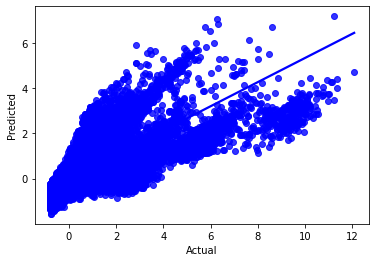

In [58]:
#Regression plot of our model.
#A regression plot is useful to understand the linear relationship between two parameters. 
#It creates a regression line in-between those parameters and then plots a scatter plot of those data points.

sns.regplot(x=y_test,y=y_pred_ml_reg,ci=None,color ='Blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [59]:
#Adding into list for final comparision table 
test.append(lin_model.score(X_test,y_test)) #co-efficient of determination of test data
train.append(lin_model.score(X_train,y_train)) #co-efficient of determination of training data

r2.append(metrics.r2_score(y_test,y_pred_ml_reg)) 
mae.append(metrics.mean_absolute_error(y_test,y_pred_ml_reg))
mape.append(metrics.mean_absolute_percentage_error(y_test,y_pred_ml_reg))
mse.append(metrics.mean_squared_error(y_test,y_pred_ml_reg))

In [60]:
regression_report_all = pd.DataFrame({'Model':['LR'],
                           'Training_Score':train,'Testing_Score':test,'R2_Score':r2,'MAE':mae,
                           'MAPE':mape,'MSE':mse})
regression_report_all

,Model,Training_Score,Testing_Score,R2_Score,MAE,MAPE,MSE
0,LR,0.533196,0.534967,0.534967,0.344754,4.305965,0.463993


# 2. Lasso Regressor

In [61]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=11)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mean_squared_error(y_test, y_pred_lasso)

0.9977665160604952

In [62]:
pd.DataFrame({'Actual': pd.DataFrame(y_test).values.reshape(-1),
              'Predicted value': pd.DataFrame(y_pred_lasso).values.reshape(-1)}).head()

,Actual,Predicted value
0,-0.415888,0.000372
1,-0.217518,0.000372
2,-0.593028,0.000372
3,-0.235788,0.000372
4,-0.090117,0.000372


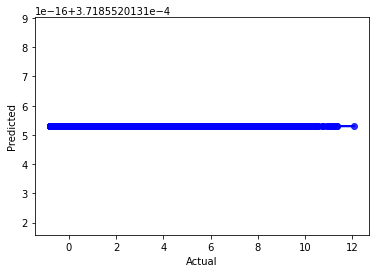

In [63]:
#Regression plot of our model.
#A regression plot is useful to understand the linear relationship between two parameters. 
#It creates a regression line in-between those parameters and then plots a scatter plot of those data points.

sns.regplot(x=y_test,y=y_pred_lasso,ci=None,color ='Blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [64]:
#Adding into list for final comparision table 
test.append(lasso.score(X_test,y_test)) #co-efficient of determination of test data
train.append(lasso.score(X_train,y_train)) #co-efficient of determination of training data

r2.append(metrics.r2_score(y_test,y_pred_lasso)) 
mae.append(metrics.mean_absolute_error(y_test,y_pred_lasso))
mape.append(metrics.mean_absolute_percentage_error(y_test,y_pred_lasso))
mse.append(metrics.mean_squared_error(y_test,y_pred_lasso))

In [65]:
regression_report_all = pd.DataFrame({'Model':['LR','LR-Lasso'],
                           'Training_Score':train,'Testing_Score':test,'R2_Score':r2,'MAE':mae,
                           'MAPE':mape,'MSE':mse})
regression_report_all

,Model,Training_Score,Testing_Score,R2_Score,MAE,MAPE,MSE
0,LR,0.533196,0.534967,0.534967,0.344754,4.305965,0.463993
1,LR-Lasso,0.000000,-0.000002,-0.000002,0.543712,1.002476,0.997767


# 3. Ridge Regressor 

In [66]:
#model tuning with Ridge 
#Value of alpha, which is a hyperparameter of Ridge, which means that they are not automatically 
#learned by the model instead they have to be set manually. We run a grid search for optimum alpha values
#To find optimum alpha for Ridge Regularization we are applying GridSearchCV

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
 
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-9,1e-2,1,5,10,11,12,13,15,20,30,40,50,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-0.46738722537622585


In [67]:
ridge=Ridge(alpha=50)
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.predict(X_test)


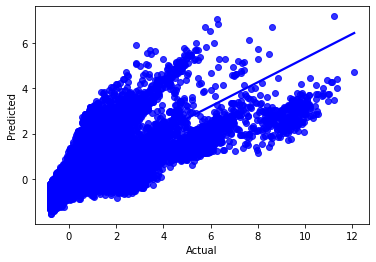

In [68]:
#Regression plot of our model.
sns.regplot(x=y_test,y=y_pred_ridge,ci=None,color ='Blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [69]:
#Adding into list for final comparision table 
test.append(ridge.score(X_test,y_test)) #co-efficient of determination of test data
train.append(ridge.score(X_train,y_train)) #co-efficient of determination of training data

r2.append(metrics.r2_score(y_test,y_pred_ridge)) 
mae.append(metrics.mean_absolute_error(y_test,y_pred_ridge))
mape.append(metrics.mean_absolute_percentage_error(y_test,y_pred_ridge))
mse.append(metrics.mean_squared_error(y_test,y_pred_ridge))

In [70]:
regression_report_all = pd.DataFrame({'Model':['LR','LR-Lasso','LR-Ridge'],
                           'Training_Score':train,'Testing_Score':test,'R2_Score':r2,'MAE':mae,
                           'MAPE':mape,'MSE':mse})
regression_report_all

,Model,Training_Score,Testing_Score,R2_Score,MAE,MAPE,MSE
0,LR,0.533196,0.534967,0.534967,0.344754,4.305965,0.463993
1,LR-Lasso,0.000000,-0.000002,-0.000002,0.543712,1.002476,0.997767
2,LR-Ridge,0.533198,0.534974,0.534974,0.344629,4.305207,0.463987


# 4. Decision Tree Regressor

In [71]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train,y_train)
y_pred_DT=dt.predict(X_test)

print("Results of Descision Tree :")
print("\n")
print("R-Squared:", metrics.r2_score(y_test,y_pred_DT))       
print("MAE:",metrics.mean_absolute_error(y_test,y_pred_DT))
print("MAPE:",metrics.mean_absolute_percentage_error(y_test,y_pred_DT))
print("MSE:", metrics.mean_squared_error(y_test,y_pred_DT)) 

Results of Descision Tree :


R-Squared: 0.9394054979657867
MAE: 0.06907221525934235
MAPE: 0.7319452266350492
MSE: 0.060459072089508924


In [72]:
#Adding into list for final comparision table 
test.append(dt.score(X_test,y_test))
train.append(dt.score(X_train,y_train)) 

r2.append(metrics.r2_score(y_test,y_pred_DT)) 
mae.append(metrics.mean_absolute_error(y_test,y_pred_DT))
mape.append(metrics.mean_absolute_percentage_error(y_test,y_pred_DT))
mse.append(metrics.mean_squared_error(y_test,y_pred_DT))

In [73]:
regression_report_all = pd.DataFrame({'Model':['LR','LR-Lasso','LR-Ridge','DT'],
                           'Training_Score':train,'Testing_Score':test,'R2_Score':r2,'MAE':mae,
                           'MAPE':mape,'MSE':mse})
regression_report_all

,Model,Training_Score,Testing_Score,R2_Score,MAE,MAPE,MSE
0,LR,0.533196,0.534967,0.534967,0.344754,4.305965,0.463993
1,LR-Lasso,0.000000,-0.000002,-0.000002,0.543712,1.002476,0.997767
2,LR-Ridge,0.533198,0.534974,0.534974,0.344629,4.305207,0.463987
3,DT,1.000000,0.939405,0.939405,0.069072,0.731945,0.060459


In [74]:
#Hypertuning Descision Tree regressor 
#params = {'min_samples_split': [30,35,40]}
#params = {'min_samples_split':[30],'max_depth' : list(range(30, 40))},
#params = {'min_samples_split':[30],'max_depth' : [38],'min_samples_leaf':list(range(1,10))}
params = {'min_samples_split':[30],'max_depth' : [38],'min_samples_leaf':[3],
          'max_leaf_nodes':list(range(9000,30000,1000))}
grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=1), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [38],
                         'max_leaf_nodes': [9000, 10000, 11000, 12000, 13000,
                                            14000, 15000, 16000, 17000, 18000,
                                            19000, 20000, 21000, 22000, 23000,
                                            24000, 25000, 26000, 27000, 28000,
                                            29000],
                         'min_samples_leaf': [3], 'min_samples_split': [30]},
             verbose=1)

In [75]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(max_depth=38, max_leaf_nodes=17000, min_samples_leaf=3,
                      min_samples_split=30, random_state=1)

In [76]:
dt = DecisionTreeRegressor(random_state=1,max_leaf_nodes=17000,min_samples_split=30,max_depth=38,min_samples_leaf=3)

dt.fit(X_train,y_train)
y_pred_DTH=dt.predict(X_test)

print("Results of Descision Tree :")
print("\n")
print("R-Squared:", metrics.r2_score(y_test,y_pred_DTH))       
print("MAE:",metrics.mean_absolute_error(y_test,y_pred_DTH))
print("MAPE:",metrics.mean_absolute_percentage_error(y_test,y_pred_DTH))
print("MSE:", metrics.mean_squared_error(y_test,y_pred_DTH))

Results of Descision Tree :


R-Squared: 0.9442105320526374
MAE: 0.07995456307796095
MAPE: 1.2825916329484628
MSE: 0.05566477735158991


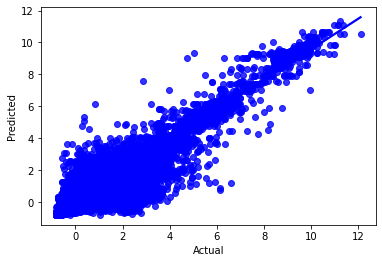

In [77]:
sns.regplot(x=y_test,y=y_pred_DTH,ci=None,color ='Blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [78]:
#Adding into list for final comparision table 
test.append(dt.score(X_test,y_test))
train.append(dt.score(X_train,y_train)) 

r2.append(metrics.r2_score(y_test,y_pred_DTH)) 
mae.append(metrics.mean_absolute_error(y_test,y_pred_DTH))
mape.append(metrics.mean_absolute_percentage_error(y_test,y_pred_DTH))
mse.append(metrics.mean_squared_error(y_test,y_pred_DTH))

In [79]:
regression_report_all = pd.DataFrame({'Model':['LR','LR-Lasso','LR-Ridge','DT','DT-HyperTuned'],
                           'Training_Score':train,'Testing_Score':test,'R2_Score':r2,'MAE':mae,
                           'MAPE':mape,'MSE':mse})
regression_report_all

,Model,Training_Score,Testing_Score,R2_Score,MAE,MAPE,MSE
0,LR,0.533196,0.534967,0.534967,0.344754,4.305965,0.463993
1,LR-Lasso,0.000000,-0.000002,-0.000002,0.543712,1.002476,0.997767
2,LR-Ridge,0.533198,0.534974,0.534974,0.344629,4.305207,0.463987
3,DT,1.000000,0.939405,0.939405,0.069072,0.731945,0.060459
4,DT-HyperTuned,0.973965,0.944211,0.944211,0.079955,1.282592,0.055665


# 5. Random Forest Regressor

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1)

rf.fit(X_train,y_train)

y_pred_RF=rf.predict(X_test)
print("Results of Random Forest :")
print("\n")
print("R-Squared:", metrics.r2_score(y_test,y_pred_RF))       
print("MAE:",metrics.mean_absolute_error(y_test,y_pred_RF))
print("MAPE:",metrics.mean_absolute_percentage_error(y_test,y_pred_RF))
print("MSE:", metrics.mean_squared_error(y_test,y_pred_RF)) 

Results of Random Forest :


R-Squared: 0.9710458110912799
MAE: 0.05165814177051366
MAPE: 0.6306295631569392
MSE: 0.028889475707501718


In [81]:
r2_score(y_test, y_pred_RF)

0.9710458110912799

In [82]:
mean_absolute_error(y_test, y_pred_RF)

0.05165814177051366

# 6. KNN Regressor

In [83]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

mean_squared_error(y_test, y_pred_knn)

0.1254827628178957

In [84]:
r2_score(y_test, y_pred_knn)

0.8742361524243921

In [85]:
mean_absolute_error(y_test, y_pred_knn)

0.12091231135263263

# 7. Voting Regressor

In [86]:
from sklearn.ensemble import VotingRegressor

vt = VotingRegressor([('lr', lin_model), ('dt', dt), ('knn', knn)])
vt.fit(X_train,y_train)
y_pred_vt = vt.predict(X_test)

mean_squared_error(y_test, y_pred_vt)

0.10949558256330161

In [95]:
r2_score(y_test, y_pred_vt)

0.8902591443919853

In [96]:
mean_absolute_error(y_test, y_pred_vt)

0.14532560511397757

# Adding lags

In [92]:
df_scaled['Used-Previous Day Same Time']=df_scaled['Used'].shift(1)

In [93]:
df_scaled.isna().sum()

month                          0
day                            0
hour                           0
minute                         0
Used                           0
Generated                      0
Dishwasher                     0
Home office                    0
Fridge                         0
Wine cellar                    0
Garage door                    0
Barn                           0
Well                           0
Microwave                      0
Living room                    0
temperature                    0
humidity                       0
visibility                     0
summary                        0
pressure                       0
windSpeed                      0
cloudCover                     0
windBearing                    0
precipIntensity                0
Furnace                        0
Kitchen                        0
weekday_Friday                 0
weekday_Monday                 0
weekday_Saturday               0
weekday_Sunday                 0
weekday_Th

In [98]:
df_scaled

,month,day,hour,minute,Used,Generated,Dishwasher,Home office,Fridge,Wine cellar,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,timing_Afternoon,timing_Evening,timing_Morning,timing_Night,Used-Previous Day Same Time
0,1.729124,1.771568,1.372658,-1.703368,0.069808,-0.566437,-0.164096,3.458983,0.795207,-0.606435,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,NaN
1,1.729124,1.771568,1.372658,-1.645625,0.071225,-0.566566,-0.164270,3.472703,0.793238,-0.606435,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,0.069808
2,1.729124,1.771568,1.372658,-1.587882,0.068847,-0.566566,-0.164183,3.491848,0.787114,-0.606435,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,0.071225
3,1.729124,1.771568,1.372658,-1.530139,0.154117,-0.566437,-0.164183,3.496794,0.781864,-0.606435,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,0.068847
4,1.729124,1.771568,1.372658,-1.472396,0.265012,-0.566566,-0.163572,3.496315,0.778146,-0.608736,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,0.154117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503905,1.729124,-0.046432,1.083722,-0.259792,0.701443,-0.568773,-0.164008,-0.378147,-0.764972,-0.577396,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,0.708656
503906,1.729124,-0.046432,1.083722,-0.202049,0.699647,-0.568383,-0.164008,-0.378466,-0.765409,-0.581421,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,0.701443
503907,1.729124,-0.046432,1.083722,-0.144306,1.006708,-0.568513,-0.164096,-0.375754,-0.768690,-0.580846,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,0.699647
503908,1.729124,-0.046432,1.083722,-0.086563,1.057674,-0.568513,-0.164008,-0.375116,-0.764097,-0.584872,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,1.006708


In [99]:
df_scaled.dropna(how='any', axis=0, inplace=True)

In [100]:
df_scaled

,month,day,hour,minute,Used,Generated,Dishwasher,Home office,Fridge,Wine cellar,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,timing_Afternoon,timing_Evening,timing_Morning,timing_Night,Used-Previous Day Same Time
1,1.729124,1.771568,1.372658,-1.645625,0.071225,-0.566566,-0.164270,3.472703,0.793238,-0.606435,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,0.069808
2,1.729124,1.771568,1.372658,-1.587882,0.068847,-0.566566,-0.164183,3.491848,0.787114,-0.606435,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,0.071225
3,1.729124,1.771568,1.372658,-1.530139,0.154117,-0.566437,-0.164183,3.496794,0.781864,-0.606435,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,0.068847
4,1.729124,1.771568,1.372658,-1.472396,0.265012,-0.566566,-0.163572,3.496315,0.778146,-0.608736,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,0.154117
5,1.729124,1.771568,1.372658,-1.414653,0.503592,-0.566826,-0.162786,3.501102,0.770928,-0.611036,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,0.265012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503905,1.729124,-0.046432,1.083722,-0.259792,0.701443,-0.568773,-0.164008,-0.378147,-0.764972,-0.577396,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,0.708656
503906,1.729124,-0.046432,1.083722,-0.202049,0.699647,-0.568383,-0.164008,-0.378466,-0.765409,-0.581421,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,0.701443
503907,1.729124,-0.046432,1.083722,-0.144306,1.006708,-0.568513,-0.164096,-0.375754,-0.768690,-0.580846,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,0.699647
503908,1.729124,-0.046432,1.083722,-0.086563,1.057674,-0.568513,-0.164008,-0.375116,-0.764097,-0.584872,...,-0.408291,-0.408291,2.451022,-0.408291,-0.408291,-0.513047,1.950195,-0.707202,-0.577419,1.006708


In [101]:
X=df_scaled.drop('Used',axis=1)
y=df_scaled['Used']

In [102]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [106]:
dt = DecisionTreeRegressor(random_state=1,max_leaf_nodes=17000,min_samples_split=30,max_depth=38,min_samples_leaf=3)
dt.fit(X_train,y_train)
y_pred_DT=dt.predict(X_test)

In [107]:
r2_score(y_test, y_pred_DT)

0.9484509807769017